In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import Image

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
zomato = pd.read_csv('./data/zomato_preprocessed_4.csv')
zomato = zomato.assign(order_time=pd.to_datetime(zomato['order_time']))
zomato

,order_id,order_time,analytical_customer_id,is_acquisition,is_successful,reason,sub_reason,owner,delivery_arrangement,gmv_amount_lc,...,affordability_amt_total,City,pay_amount,is_consistent,afford_ratio,is_gold,ad_revenue,is_ressurected,portion,satisfaction
0,543991243,2021-09-01 00:00:51,ygyH_eaSHCTSSgAda33qDLYA,False,True,NaN,NaN,NaN,TGO,67.43,...,13.486,Chennai,53.944,False,20.0,False,5.44,False,1,4
1,543992115,2021-09-01 00:02:50,vagdCBP6L9S461DAPk0tNs-A,False,True,NaN,NaN,NaN,TGO,53.50,...,NaN,Mumbai,53.500,True,NaN,False,9.17,False,1,4
2,543992763,2021-09-01 00:04:26,65RUZmnykIRzyWaqnOaB_EdQ,False,False,LATE_DELIVERY,NaN,VENDOR,TGO,72.99,...,NaN,Chennai,72.990,True,NaN,False,6.92,False,1,2
3,543993755,2021-09-01 00:06:41,THNssTsOurRqOJf9sQEhwiRg,False,True,NaN,NaN,NaN,TGO,206.00,...,NaN,Chennai,206.000,True,NaN,False,5.83,False,3,5
4,543994010,2021-09-01 00:07:13,OGX49Bsq0pR5qB32sT83JhSg,False,True,NaN,NaN,NaN,TGO,100.99,...,NaN,Chennai,100.990,True,NaN,False,7.41,False,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118195,644315564,2022-01-02 23:57:08,xdSbyNHiYORwiK2AHYieL5UQ,False,False,CUSTOMER_MISTAKE_ERROR,Changed mind - Mistake / Error,CUSTOMER,TGO,147.49,...,NaN,Chennai,147.490,True,NaN,False,6.62,False,2,1
118196,644315682,2022-01-02 23:57:25,AYeFPGmOUyT4OIWfmTSCYikw,False,True,NaN,NaN,NaN,TGO,110.49,...,NaN,Coimbatore,110.490,True,NaN,False,9.90,False,1,5
118197,644316048,2022-01-02 23:58:05,COnO0tda5iSTa-t5dFFVTpwg,False,False,ONLINE_PAYMENT,NaN,CUSTOMER/PLATFORM,TGO,112.49,...,NaN,Chennai,112.490,True,NaN,False,7.36,False,1,2
118198,644316064,2022-01-02 23:58:07,iI6rRPz2LkRi2Ct0zTaksrOA,False,True,NaN,NaN,NaN,TGO,739.24,...,NaN,Chennai,739.240,True,NaN,False,5.17,False,10,2


In [3]:
success_delivery = zomato[zomato['is_successful']==True]
failed_delivery = zomato[zomato['is_successful']==False]

# Coupon, OrderCount Correlation

In [4]:
success_delivery_for_corr = success_delivery.copy()

success_delivery_for_corr.loc[success_delivery_for_corr['is_affordable_freedelivery']==False, 'is_affordable_freedelivery'] = np.nan
success_delivery_for_corr.loc[success_delivery_for_corr['is_affordable_item']==False, 'is_affordable_item'] = np.nan
success_delivery_for_corr.loc[success_delivery_for_corr['is_affordable_gem']==False, 'is_affordable_gem'] = np.nan
success_delivery_for_corr.loc[success_delivery_for_corr['is_affordable_restaurant']==False, 'is_affordable_restaurant'] = np.nan
success_delivery_for_corr.loc[success_delivery_for_corr['is_affordable_voucher']==False, 'is_affordable_voucher'] = np.nan
success_delivery_for_corr

,order_id,order_time,analytical_customer_id,is_acquisition,is_successful,reason,sub_reason,owner,delivery_arrangement,gmv_amount_lc,...,affordability_amt_total,City,pay_amount,is_consistent,afford_ratio,is_gold,ad_revenue,is_ressurected,portion,satisfaction
0,543991243,2021-09-01 00:00:51,ygyH_eaSHCTSSgAda33qDLYA,False,True,NaN,NaN,NaN,TGO,67.43,...,13.486,Chennai,53.944,False,20.0,False,5.44,False,1,4
1,543992115,2021-09-01 00:02:50,vagdCBP6L9S461DAPk0tNs-A,False,True,NaN,NaN,NaN,TGO,53.50,...,NaN,Mumbai,53.500,True,NaN,False,9.17,False,1,4
3,543993755,2021-09-01 00:06:41,THNssTsOurRqOJf9sQEhwiRg,False,True,NaN,NaN,NaN,TGO,206.00,...,NaN,Chennai,206.000,True,NaN,False,5.83,False,3,5
4,543994010,2021-09-01 00:07:13,OGX49Bsq0pR5qB32sT83JhSg,False,True,NaN,NaN,NaN,TGO,100.99,...,NaN,Chennai,100.990,True,NaN,False,7.41,False,1,3
5,543995285,2021-09-01 00:10:21,NiPNR-NifZRviafzNw9WMEkg,False,True,NaN,NaN,NaN,TGO,228.11,...,NaN,Delhi,228.110,True,NaN,False,6.99,False,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118193,644314669,2022-01-02 23:55:09,RyZAMq2ec2TpeHLJ21bSCyiA,False,True,NaN,NaN,NaN,TGO,141.99,...,NaN,Chennai,141.990,True,NaN,False,5.42,False,2,2
118194,644315424,2022-01-02 23:56:48,UiiaJ3k-sZR2-0lYkqGXuZBg,False,True,NaN,NaN,NaN,TGO,96.99,...,NaN,Gurgaon,96.990,True,NaN,True,NaN,False,1,4
118196,644315682,2022-01-02 23:57:25,AYeFPGmOUyT4OIWfmTSCYikw,False,True,NaN,NaN,NaN,TGO,110.49,...,NaN,Coimbatore,110.490,True,NaN,False,9.90,False,1,5
118198,644316064,2022-01-02 23:58:07,iI6rRPz2LkRi2Ct0zTaksrOA,False,True,NaN,NaN,NaN,TGO,739.24,...,NaN,Chennai,739.240,True,NaN,False,5.17,False,10,2


In [5]:
by_customer_count = success_delivery_for_corr.groupby('analytical_customer_id').count()[['is_affordable_freedelivery', 'is_affordable_item', 'is_affordable_gem', 
                                                                                         'is_affordable_restaurant', 'is_affordable_voucher', 'order_id']]
by_customer_count = by_customer_count.rename(columns={'is_affordable_freedelivery':'freedelivery', 
                                                      'is_affordable_item':'item', 
                                                      'is_affordable_gem':'gem', 
                                                      'is_affordable_restaurant':'restaurant',
                                                      'is_affordable_voucher':'voucher',
                                                      'order_id':'order_count'})
by_customer_count

,freedelivery,item,gem,restaurant,voucher,order_count
analytical_customer_id,,,,,,
0-4ImcwasFRtaAquwJ2uYhwQ,0,0,0,0,0,1
0-4cZutO5WRNOZM4t5lHp_yQ,0,0,0,0,1,5
0-6kezqWu6RNW65Qqd9p-0KQ,0,0,0,0,0,1
0-QdgcyCbrT3Ca-wyteQXQzw,0,0,0,0,0,1
000rjpX6uhTU6gYcXqhmsbiA,0,0,0,0,1,1
...,...,...,...,...,...,...
zxcS6ybyTgQDye6kbY45xDuw,0,0,0,0,1,1
zy2Seop-MVRI-oHbpOa9eSEQ,0,0,0,0,0,1
zyjOsCm-CkQ2-XZamK_C8T_Q,0,0,0,0,1,1


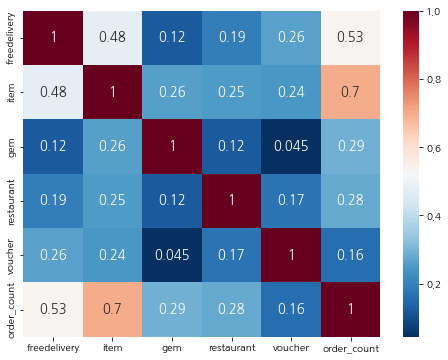

In [6]:
plt.figure(figsize=(8,6))
by_customer_corr = by_customer_count.corr()
sns.heatmap(by_customer_corr, cmap='RdBu_r', annot=True, annot_kws={"size": 13})
plt.show()

# RFM 

- **Number of Order** : COUNTD([Order Id]) <- 이 부분 성공으로 한정 시켜야함
</br></br>
- **Recency** : DATEDIFF('day',{ FIXED [Analytical Customer Id],year([Order Time]): MAX([Order Time])}, [Max Order Date of the Month])+1
- **Frequency** : {FIXED [Analytical Customer Id] ,year([Order Time]) : [Number of Order]}
- **Monetary** : {FIXED [Analytical Customer Id], year([Order Time]): SUM([Pay Amount])}
</br></br>
- **Recency Score** : if [Recency] >= { FIXED year([Order Time]): PERCENTILE([Recency], 0.75)} then 1 </br> ELSEIF [Recency] >= { FIXED year([Order Time]): PERCENTILE([Recency],0.5)} then 2 </br> ELSEIF [Recency] >= { FIXED year([Order Time]): PERCENTILE([Recency],0.25)} then 3 </br> else 4 end
- **Frequency Score** if [Frequency] >= { FIXED year([Order Time]): PERCENTILE([Frequency],0.75)} then 4 </br> ELSEIF [Frequency] >= { FIXED year([Order Time]): PERCENTILE([Frequency],0.5)} then 3  </br> ELSEIF [Frequency] >= { FIXED year([Order Time]): PERCENTILE([Frequency],0.25)} then 2  </br> else 1 end
- **Monetary Score** : if [Monetary] >= { FIXED year([Order Time]): PERCENTILE([Monetary],0.75)} then 4 </br> ELSEIF [Monetary] >= { FIXED year([Order Time]): PERCENTILE([Monetary],0.5)} then 3 </br> ELSEIF [Monetary] >= { FIXED year([Order Time]): PERCENTILE([Monetary],0.25)} then 2 </br> else 1 end
</br></br>
- **RFM score** : [Frequency Score] + [Monetary Score] + [Recency Score]
- **RFM** : STR([Recency Score]) +STR([Frequency Score]) + STR([Monetary Score])

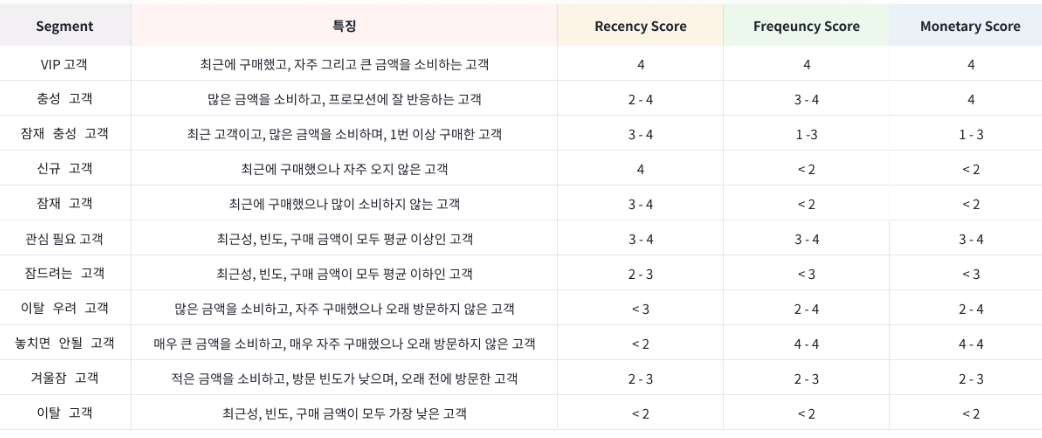

In [7]:
Image('./data/RFM.png', width=800, height=500)

- IF [Frequency Score]>= 4 and [Monetary Score]>= 4 and [Recency Score]>= 4 then **VIP 고객**
- ELSEIF [Recency Score]>=2 and [Recency Score]<=4 and [Frequency Score]>=3 and [Frequency Score]<=4 and [Monetary Score]>=4 then **충성 고객**
- ELSEIF [Recency Score]>=3 and [Frequency Score]>=1 and [Frequency Score]<=3 and [Monetary Score]>=1 and [Monetary Score]<=3 then **잠재 충성 고객**
- ELSEIF [Recency Score]>=4 and [Frequency Score]<2 and [Monetary Score]<2 then **신규 고객**
- ELSEIF [Recency Score]>=3 and [Recency Score]<=4 and [Frequency Score]<2 and [Monetary Score]<2 then **잠재 고객**
- ELSEIF [Recency Score]>=3 and [Recency Score]<=4 and [Frequency Score]>=3 and [Frequency Score]<=4 and [Monetary Score]>=3 and [Monetary Score]<=4 then **관심 필요 고객**
- ELSEIF [Recency Score]>=2 and [Recency Score]<=3 and [Frequency Score]<3 and [Monetary Score]<3 then **잠드려는 고객**
- ELSEIF [Recency Score]<3 and [Frequency Score]>=2 and [Frequency Score]<=4 and [Monetary Score]>=2 and [Monetary Score]<=4 then **이탈 우려 고객**
- ELSEIF [Recency Score]<2 and [Frequency Score]>=4 and [Monetary Score]>=4  then **놓치면 안되는 고객**
- ELSEIF [Recency Score]>=2 and [Recency Score]<=3 and [Frequency Score]>=2 and [Frequency Score]<=3 and [Monetary Score]>=2 and [Monetary Score]<=3 then **겨울잠 고객**
- ELSEIF [Recency Score]<2 and [Frequency Score]<2 and [Monetary Score]<2  then **이탈 고객**
- END

In [8]:
success_delivery_2021 = success_delivery[success_delivery['order_time']<pd.to_datetime('2022-01-01')]
success_delivery_2021

,order_id,order_time,analytical_customer_id,is_acquisition,is_successful,reason,sub_reason,owner,delivery_arrangement,gmv_amount_lc,...,affordability_amt_total,City,pay_amount,is_consistent,afford_ratio,is_gold,ad_revenue,is_ressurected,portion,satisfaction
0,543991243,2021-09-01 00:00:51,ygyH_eaSHCTSSgAda33qDLYA,False,True,NaN,NaN,NaN,TGO,67.43,...,13.486,Chennai,53.944,False,20.00,False,5.44,False,1,4
1,543992115,2021-09-01 00:02:50,vagdCBP6L9S461DAPk0tNs-A,False,True,NaN,NaN,NaN,TGO,53.50,...,NaN,Mumbai,53.500,True,NaN,False,9.17,False,1,4
3,543993755,2021-09-01 00:06:41,THNssTsOurRqOJf9sQEhwiRg,False,True,NaN,NaN,NaN,TGO,206.00,...,NaN,Chennai,206.000,True,NaN,False,5.83,False,3,5
4,543994010,2021-09-01 00:07:13,OGX49Bsq0pR5qB32sT83JhSg,False,True,NaN,NaN,NaN,TGO,100.99,...,NaN,Chennai,100.990,True,NaN,False,7.41,False,1,3
5,543995285,2021-09-01 00:10:21,NiPNR-NifZRviafzNw9WMEkg,False,True,NaN,NaN,NaN,TGO,228.11,...,NaN,Delhi,228.110,True,NaN,False,6.99,False,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116345,642643715,2021-12-31 23:48:10,v8uxxmwmTlShmmihweXprLWA,False,True,NaN,NaN,NaN,TGO,98.99,...,NaN,Chennai,98.990,True,NaN,False,9.45,False,1,5
116346,642644354,2021-12-31 23:49:18,VoqoDDDyxPRVyxeUD2hJljdw,False,True,NaN,NaN,NaN,TGO,121.49,...,NaN,Chennai,121.490,True,NaN,True,NaN,False,2,3
116347,642646321,2021-12-31 23:52:44,FC3bsdIywEQ9yo68IGc6wwNA,False,True,NaN,NaN,NaN,TGO,98.85,...,NaN,Chennai,98.850,True,NaN,True,NaN,False,1,4
116349,642647977,2021-12-31 23:55:39,l8Eg-pveIiTPef7zvUtXBOwA,False,True,NaN,NaN,NaN,TGO,186.65,...,77.000,Chennai,159.650,False,32.54,False,5.88,False,3,3


## Recency

In [9]:
max_order_time = success_delivery_2021['order_time'].max()
success_delivery_2021_last_order_time = success_delivery_2021.groupby('analytical_customer_id')['order_time'].max().reset_index()
success_delivery_2021_recency = success_delivery_2021_last_order_time.assign(date_diff= max_order_time - success_delivery_2021_last_order_time['order_time'])
success_delivery_2021_recency = success_delivery_2021_recency.assign(recency = success_delivery_2021_recency['date_diff'].astype(str).str.split(' days').str.get(0).astype(int))
success_delivery_2021_recency

,analytical_customer_id,order_time,date_diff,recency
0,0-4ImcwasFRtaAquwJ2uYhwQ,2021-09-06 02:02:01,116 days 21:54:43,116
1,0-4cZutO5WRNOZM4t5lHp_yQ,2021-12-27 10:53:27,4 days 13:03:17,4
2,0-6kezqWu6RNW65Qqd9p-0KQ,2021-11-18 21:58:08,43 days 01:58:36,43
3,0-QdgcyCbrT3Ca-wyteQXQzw,2021-10-01 17:57:46,91 days 05:58:58,91
4,000rjpX6uhTU6gYcXqhmsbiA,2021-09-03 01:01:06,119 days 22:55:38,119
...,...,...,...,...
13136,zxcS6ybyTgQDye6kbY45xDuw,2021-11-02 15:20:33,59 days 08:36:11,59
13137,zy2Seop-MVRI-oHbpOa9eSEQ,2021-09-24 20:01:26,98 days 03:55:18,98
13138,zyjOsCm-CkQ2-XZamK_C8T_Q,2021-10-09 22:16:17,83 days 01:40:27,83
13139,zzu1rDr62_S_6SzqrMOrJz1w,2021-12-27 11:38:25,4 days 12:18:19,4


## Frequency

In [10]:
# order_count

success_delivery_2021_frequency = success_delivery_2021.groupby('analytical_customer_id')['order_id'].count().reset_index()
success_delivery_2021_frequency = success_delivery_2021_frequency.rename(columns={'order_id':'frequency'})
success_delivery_2021_frequency

,analytical_customer_id,frequency
0,0-4ImcwasFRtaAquwJ2uYhwQ,1
1,0-4cZutO5WRNOZM4t5lHp_yQ,4
2,0-6kezqWu6RNW65Qqd9p-0KQ,1
3,0-QdgcyCbrT3Ca-wyteQXQzw,1
4,000rjpX6uhTU6gYcXqhmsbiA,1
...,...,...
13136,zxcS6ybyTgQDye6kbY45xDuw,1
13137,zy2Seop-MVRI-oHbpOa9eSEQ,1
13138,zyjOsCm-CkQ2-XZamK_C8T_Q,1
13139,zzu1rDr62_S_6SzqrMOrJz1w,14


In [11]:
# quantity

# success_delivery_2021_frequency = success_delivery_2021.groupby('analytical_customer_id')['portion'].sum().reset_index()
# success_delivery_2021_frequency = success_delivery_2021_frequency.rename(columns={'portion':'frequency'})
# success_delivery_2021_frequency

## Monetary

In [12]:
import warnings
warnings.filterwarnings('ignore')

# delivery_profit
success_delivery_2021.loc[success_delivery_2021['delivery_arrangement']=='TGO', 'delivery_profit'] = success_delivery_2021['delivery_fee_amount_lc'] * 0.76
success_delivery_2021.loc[success_delivery_2021['delivery_arrangement']=='TMP', 'delivery_profit'] = 0

# state_profit
success_delivery_2021.loc[success_delivery_2021['City'].isin(['Chennai', 'Delhi']), 'state_profit'] = 0.05
success_delivery_2021.loc[~success_delivery_2021['City'].isin(['Chennai', 'Delhi']), 'state_profit'] = 0

# store_profit
success_delivery_2021.loc[success_delivery_2021['vertical_class']=='food', 'store_profit'] = success_delivery_2021['basket_amount_lc'] * 0.2
success_delivery_2021.loc[success_delivery_2021['vertical_class']=='non-food', 'store_profit'] = success_delivery_2021['basket_amount_lc'] * 0.15

# order_profit
success_delivery_2021 = success_delivery_2021.assign(order_profit=3)

# gold_fee
# -> 이거는 groupby 하면서 계산할 것

In [13]:
success_delivery_2021_forgroup = success_delivery_2021.copy()
success_delivery_2021_forgroup = success_delivery_2021.assign(order_month=success_delivery_2021['order_time'].dt.strftime('%Y-%m'))
success_delivery_2021_forgroup = success_delivery_2021_forgroup[['order_id', 'analytical_customer_id', 'order_month', 'is_gold',
                                                                 'delivery_profit', 'state_profit', 'store_profit', 'order_profit',
                                                                 'ad_revenue', 'pay_amount']]
success_delivery_2021_forgroup = success_delivery_2021_forgroup.fillna(0)
success_delivery_2021_forgroup

,order_id,analytical_customer_id,order_month,is_gold,delivery_profit,state_profit,store_profit,order_profit,ad_revenue,pay_amount
0,543991243,ygyH_eaSHCTSSgAda33qDLYA,2021-09,False,11.3924,0.05,10.4880,3,5.44,53.944
1,543992115,vagdCBP6L9S461DAPk0tNs-A,2021-09,False,0.0000,0.00,10.7000,3,9.17,53.500
3,543993755,THNssTsOurRqOJf9sQEhwiRg,2021-09,False,7.5924,0.05,39.2020,3,5.83,206.000
4,543994010,OGX49Bsq0pR5qB32sT83JhSg,2021-09,False,3.7924,0.05,19.2000,3,7.41,100.990
5,543995285,NiPNR-NifZRviafzNw9WMEkg,2021-09,False,0.0000,0.05,45.6220,3,6.99,228.110
...,...,...,...,...,...,...,...,...,...,...
116345,642643715,v8uxxmwmTlShmmihweXprLWA,2021-12,False,7.5924,0.05,17.8000,3,9.45,98.990
116346,642644354,VoqoDDDyxPRVyxeUD2hJljdw,2021-12,True,3.7924,0.05,23.3000,3,0.00,121.490
116347,642646321,FC3bsdIywEQ9yo68IGc6wwNA,2021-12,True,0.0000,0.05,14.8275,3,0.00,98.850
116349,642647977,l8Eg-pveIiTPef7zvUtXBOwA,2021-12,False,0.0000,0.05,35.4975,3,5.88,159.650


In [14]:
# profit code

success_delivery_2021_by_id = success_delivery_2021_forgroup.groupby('analytical_customer_id')[['delivery_profit', 'state_profit', 'store_profit', 'order_profit', 'ad_revenue']].sum().reset_index()
success_delivery_2021_goldprofit = success_delivery_2021_forgroup[success_delivery_2021_forgroup['is_gold']==True].groupby('analytical_customer_id')['order_month'].nunique().reset_index()
success_delivery_2021_goldprofit = success_delivery_2021_goldprofit.assign(order_month = success_delivery_2021_goldprofit['order_month']*333)
success_delivery_2021_goldprofit = success_delivery_2021_goldprofit.rename(columns={'order_month':'gold_profit'})
success_delivery_2021_profit = success_delivery_2021_by_id.merge(success_delivery_2021_goldprofit, how='left', on='analytical_customer_id')
success_delivery_2021_profit = success_delivery_2021_profit.fillna(0)

success_delivery_2021_monetary = success_delivery_2021_profit.assign(profit=success_delivery_2021_profit.sum(axis=1))
success_delivery_2021_monetary = success_delivery_2021_monetary.rename(columns={'profit':'monetary'})
success_delivery_2021_monetary

,analytical_customer_id,delivery_profit,state_profit,store_profit,order_profit,ad_revenue,gold_profit,monetary
0,0-4ImcwasFRtaAquwJ2uYhwQ,0.0000,0.05,17.200,3,5.25,0.0,25.5000
1,0-4cZutO5WRNOZM4t5lHp_yQ,12.1296,0.00,44.194,12,23.70,0.0,92.0236
2,0-6kezqWu6RNW65Qqd9p-0KQ,3.7924,0.05,64.000,3,5.39,0.0,76.2324
3,0-QdgcyCbrT3Ca-wyteQXQzw,0.0000,0.05,30.400,3,5.93,0.0,39.3800
4,000rjpX6uhTU6gYcXqhmsbiA,3.7924,0.05,38.000,3,7.90,0.0,52.7424
...,...,...,...,...,...,...,...,...
13136,zxcS6ybyTgQDye6kbY45xDuw,7.5924,0.05,24.000,3,5.54,0.0,40.1824
13137,zy2Seop-MVRI-oHbpOa9eSEQ,0.0000,0.05,21.696,3,7.13,0.0,31.8760
13138,zyjOsCm-CkQ2-XZamK_C8T_Q,7.5924,0.05,24.000,3,9.46,0.0,44.1024
13139,zzu1rDr62_S_6SzqrMOrJz1w,65.3144,0.70,571.714,42,22.39,1332.0,2034.1184


In [15]:
# pay_amount code

# success_delivery_2021_monetary = success_delivery_2021_forgroup.groupby('analytical_customer_id')['pay_amount'].sum().reset_index()
# success_delivery_2021_monetary = success_delivery_2021_monetary.rename(columns={'pay_amount':'monetary'})
# success_delivery_2021_monetary

## Merge RFM

In [16]:
Recency = success_delivery_2021_recency[['analytical_customer_id', 'recency']]
Frequency = success_delivery_2021_frequency[['analytical_customer_id', 'frequency']]
Monetary = success_delivery_2021_monetary[['analytical_customer_id', 'monetary']]

In [17]:
RFM = Recency.merge(Frequency, how='left', on='analytical_customer_id').merge(Monetary, how='left', on='analytical_customer_id')
RFM

,analytical_customer_id,recency,frequency,monetary
0,0-4ImcwasFRtaAquwJ2uYhwQ,116,1,25.5000
1,0-4cZutO5WRNOZM4t5lHp_yQ,4,4,92.0236
2,0-6kezqWu6RNW65Qqd9p-0KQ,43,1,76.2324
3,0-QdgcyCbrT3Ca-wyteQXQzw,91,1,39.3800
4,000rjpX6uhTU6gYcXqhmsbiA,119,1,52.7424
...,...,...,...,...
13136,zxcS6ybyTgQDye6kbY45xDuw,59,1,40.1824
13137,zy2Seop-MVRI-oHbpOa9eSEQ,98,1,31.8760
13138,zyjOsCm-CkQ2-XZamK_C8T_Q,83,1,44.1024
13139,zzu1rDr62_S_6SzqrMOrJz1w,4,14,2034.1184


In [18]:
customer = pd.read_csv('./data/customer.csv')
customer

,analytical_customer_id,is_gold,amt_total,afford_amt_total,order_count
0,0-4ImcwasFRtaAquwJ2uYhwQ,False,86.00,0.0,1
1,0-4cZutO5WRNOZM4t5lHp_yQ,False,238.47,40.0,5
2,0-6kezqWu6RNW65Qqd9p-0KQ,False,320.00,0.0,1
3,0-QdgcyCbrT3Ca-wyteQXQzw,False,152.00,0.0,1
4,000rjpX6uhTU6gYcXqhmsbiA,False,190.00,70.0,1
...,...,...,...,...,...
13554,zTSweZeuAPTMu29uez_dxQsg,False,0.00,0.0,0
13555,zf6lRiNCY-QyC8iJNDHsrsuw,False,0.00,0.0,0
13556,zi-pOZXabyS7aazYX-gtzf7w,False,0.00,0.0,0
13557,zrtLw2ZSQbQgSHyQZJYoQx-A,False,0.00,0.0,0


In [19]:
RFM = RFM.merge(customer[['analytical_customer_id', 'is_gold']], how='left')
RFM

,analytical_customer_id,recency,frequency,monetary,is_gold
0,0-4ImcwasFRtaAquwJ2uYhwQ,116,1,25.5000,False
1,0-4cZutO5WRNOZM4t5lHp_yQ,4,4,92.0236,False
2,0-6kezqWu6RNW65Qqd9p-0KQ,43,1,76.2324,False
3,0-QdgcyCbrT3Ca-wyteQXQzw,91,1,39.3800,False
4,000rjpX6uhTU6gYcXqhmsbiA,119,1,52.7424,False
...,...,...,...,...,...
13136,zxcS6ybyTgQDye6kbY45xDuw,59,1,40.1824,False
13137,zy2Seop-MVRI-oHbpOa9eSEQ,98,1,31.8760,False
13138,zyjOsCm-CkQ2-XZamK_C8T_Q,83,1,44.1024,False
13139,zzu1rDr62_S_6SzqrMOrJz1w,4,14,2034.1184,True


In [20]:
RFM_des = RFM.describe()

# recency_score
RFM.loc[RFM['recency']>=RFM_des['recency']['75%'], 'recency_score'] = 1
RFM.loc[(RFM['recency']>=RFM_des['recency']['50%']) & (RFM['recency']<RFM_des['recency']['75%']), 'recency_score'] = 2
RFM.loc[(RFM['recency']>=RFM_des['recency']['25%']) & (RFM['recency']<RFM_des['recency']['50%']), 'recency_score'] = 3
RFM.loc[RFM['recency'] < RFM_des['recency']['25%'], 'recency_score'] = 4

# frequency_score
RFM.loc[RFM['frequency']>=RFM_des['frequency']['75%'], 'frequency_score'] = 4
RFM.loc[(RFM['frequency']>=RFM_des['frequency']['50%']) & (RFM['frequency']<RFM_des['frequency']['75%']), 'frequency_score'] = 3
RFM.loc[(RFM['frequency']>=RFM_des['frequency']['25%']) & (RFM['frequency']<RFM_des['frequency']['50%']), 'frequency_score'] = 2
RFM.loc[RFM['frequency'] < RFM_des['frequency']['25%'], 'frequency_score'] = 1

# monetary_score
RFM.loc[RFM['monetary']>=RFM_des['monetary']['75%'], 'monetary_score'] = 4
RFM.loc[(RFM['monetary']>=RFM_des['monetary']['50%']) & (RFM['monetary']<RFM_des['monetary']['75%']), 'monetary_score'] = 3
RFM.loc[(RFM['monetary']>=RFM_des['monetary']['25%']) & (RFM['monetary']<RFM_des['monetary']['50%']), 'monetary_score'] = 2
RFM.loc[RFM['monetary'] < RFM_des['monetary']['25%'], 'monetary_score'] = 1

RFM[['recency_score', 'frequency_score', 'monetary_score']] = RFM[['recency_score', 'frequency_score', 'monetary_score']].astype(int)
RFM = RFM.assign(RFM_score=RFM['recency_score'].astype(str) + RFM['frequency_score'].astype(str) + RFM['monetary_score'].astype(str))
RFM = RFM.set_index('analytical_customer_id')

In [21]:
RFM

,recency,frequency,monetary,is_gold,recency_score,frequency_score,monetary_score,RFM_score
analytical_customer_id,,,,,,,,
0-4ImcwasFRtaAquwJ2uYhwQ,116,1,25.5000,False,1,2,1,121
0-4cZutO5WRNOZM4t5lHp_yQ,4,4,92.0236,False,4,3,2,432
0-6kezqWu6RNW65Qqd9p-0KQ,43,1,76.2324,False,2,2,2,222
0-QdgcyCbrT3Ca-wyteQXQzw,91,1,39.3800,False,1,2,1,121
000rjpX6uhTU6gYcXqhmsbiA,119,1,52.7424,False,1,2,1,121
...,...,...,...,...,...,...,...,...
zxcS6ybyTgQDye6kbY45xDuw,59,1,40.1824,False,2,2,1,221
zy2Seop-MVRI-oHbpOa9eSEQ,98,1,31.8760,False,1,2,1,121
zyjOsCm-CkQ2-XZamK_C8T_Q,83,1,44.1024,False,1,2,1,121


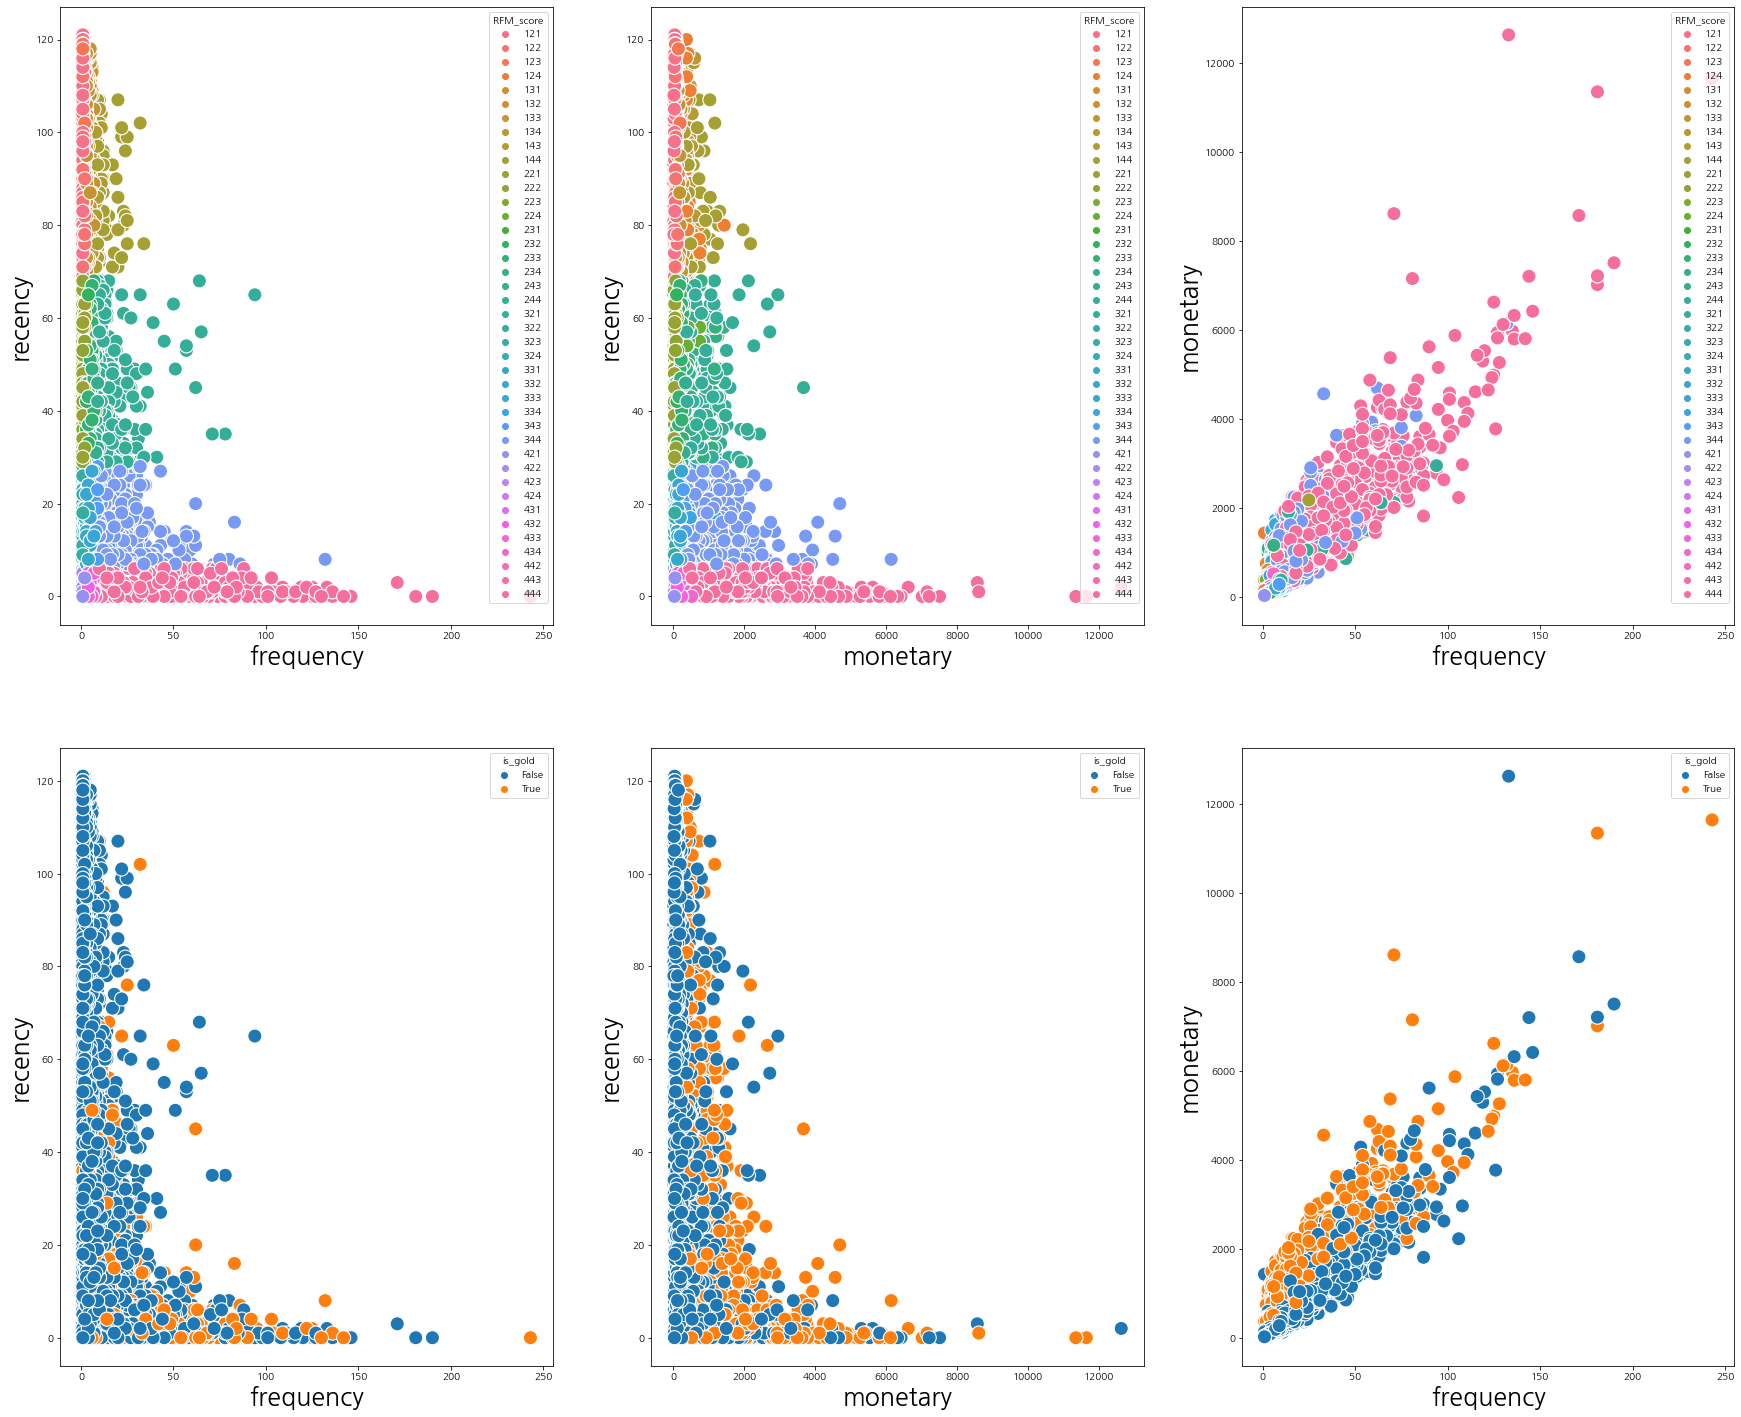

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(30,25))

sns.scatterplot(data=RFM, x='frequency', y='recency', hue='RFM_score', hue_order=sorted(RFM.RFM_score.unique()), ax=axes[0][0], s=200)
sns.scatterplot(data=RFM, x='monetary', y='recency', hue='RFM_score', hue_order=sorted(RFM.RFM_score.unique()), ax=axes[0][1], s=200)
sns.scatterplot(data=RFM, x='frequency', y='monetary', hue='RFM_score', hue_order=sorted(RFM.RFM_score.unique()), ax=axes[0][2], s=200)

sns.scatterplot(data=RFM, x='frequency', y='recency', hue='is_gold', ax=axes[1][0], s=200)
sns.scatterplot(data=RFM, x='monetary', y='recency', hue='is_gold', ax=axes[1][1], s=200)
sns.scatterplot(data=RFM, x='frequency', y='monetary', hue='is_gold', ax=axes[1][2], s=200)

axes[0][0].set_xlabel('frequency', fontsize=25)
axes[0][1].set_xlabel('monetary', fontsize=25)
axes[0][2].set_xlabel('frequency', fontsize=25)
axes[1][0].set_xlabel('frequency', fontsize=25)
axes[1][1].set_xlabel('monetary', fontsize=25)
axes[1][2].set_xlabel('frequency', fontsize=25)

axes[0][0].set_ylabel('recency', fontsize=25)
axes[0][1].set_ylabel('recency', fontsize=25)
axes[0][2].set_ylabel('monetary', fontsize=25)
axes[1][0].set_ylabel('recency', fontsize=25)
axes[1][1].set_ylabel('recency', fontsize=25)
axes[1][2].set_ylabel('monetary', fontsize=25)

plt.show()

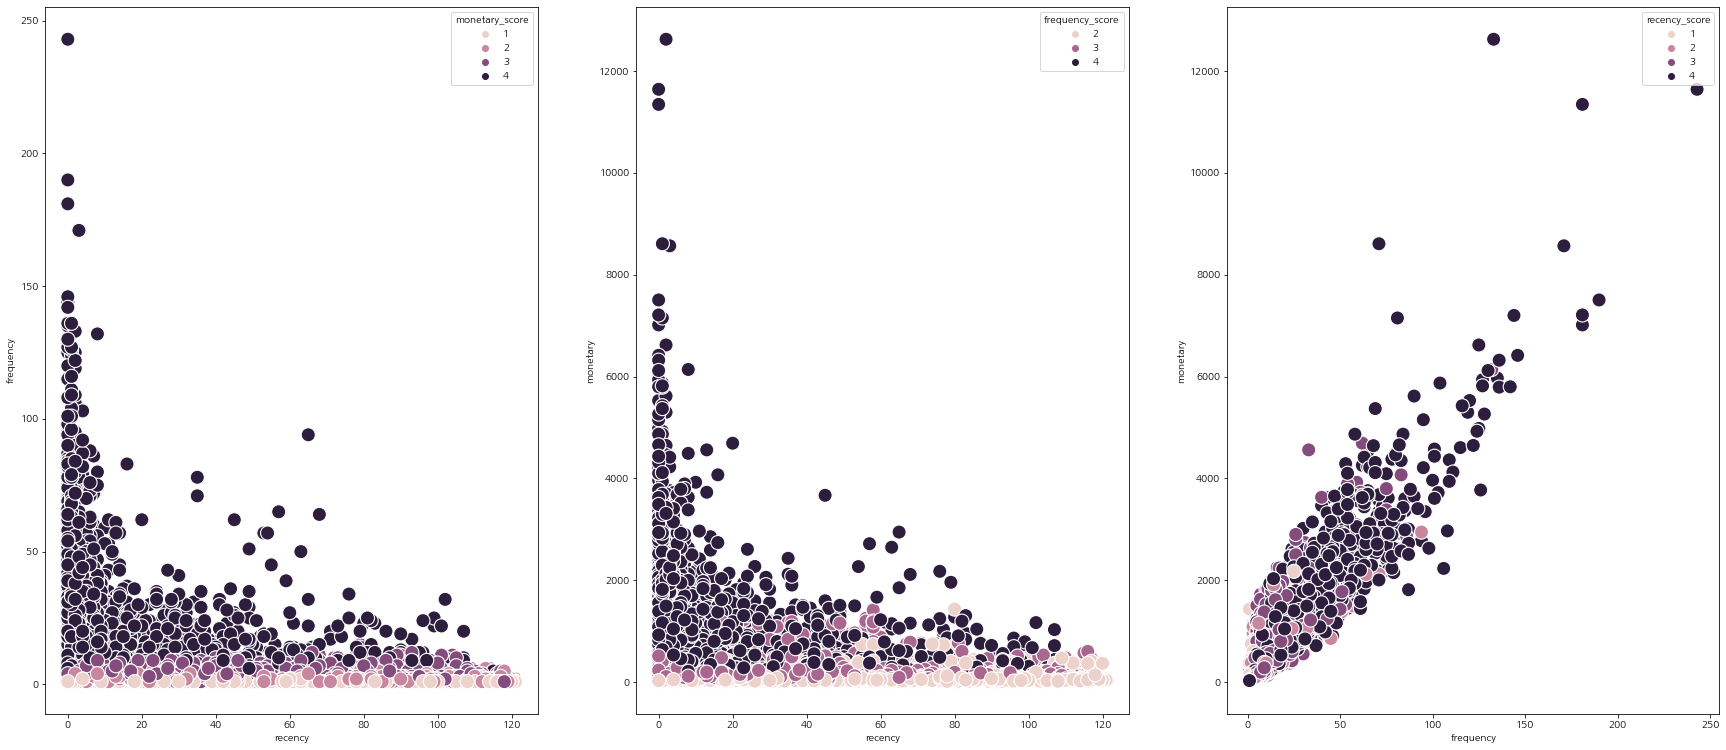

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(30,13))

sns.scatterplot(data=RFM, x='recency', y='frequency', hue='monetary_score', ax=axes[0], s=200)
sns.scatterplot(data=RFM, x='recency', y='monetary', hue='frequency_score', ax=axes[1], s=200)
sns.scatterplot(data=RFM, x='frequency', y='monetary', hue='recency_score', ax=axes[2], s=200)

plt.show()

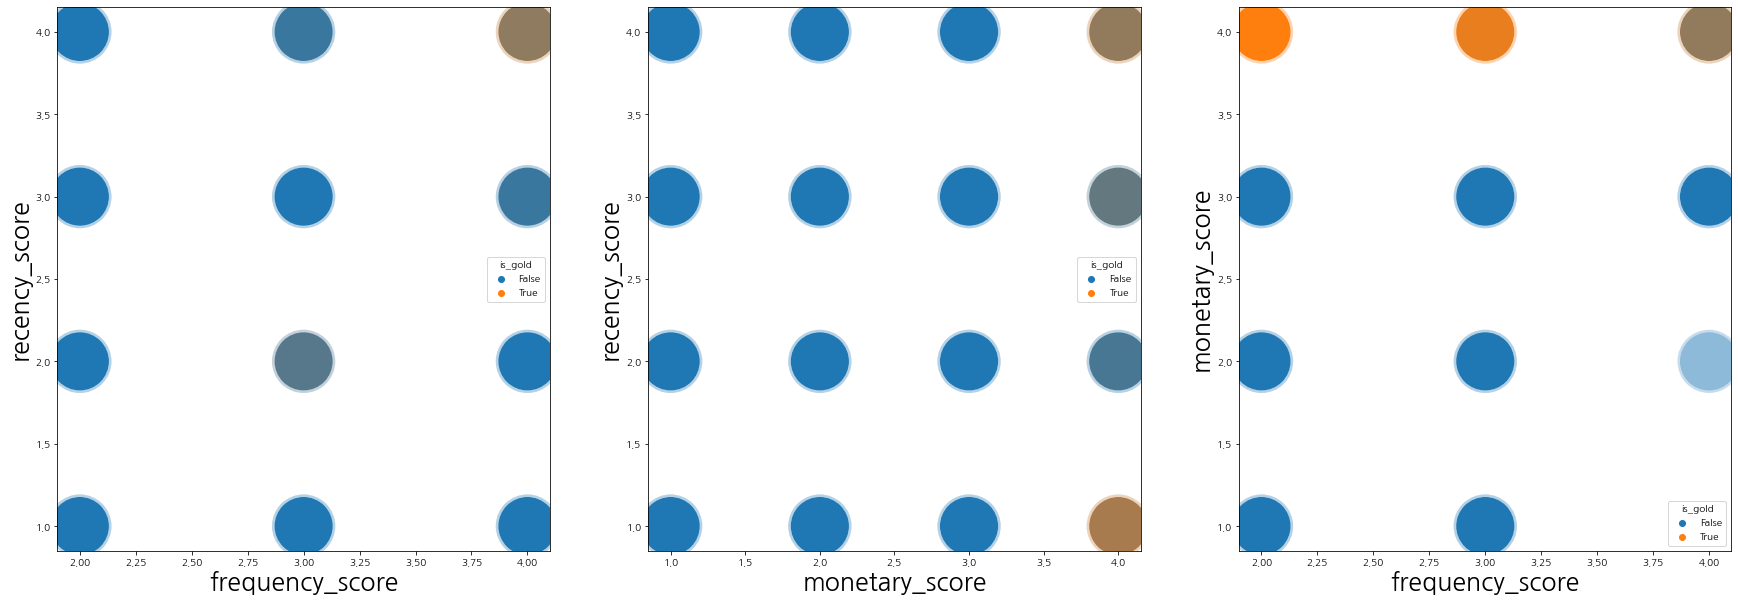

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(30,10))

sns.scatterplot(data=RFM, x='frequency_score', y='recency_score', hue='is_gold', ax=axes[0], s=4000, alpha=0.5, palette='tab10')
sns.scatterplot(data=RFM, x='monetary_score', y='recency_score', hue='is_gold', ax=axes[1], s=4000, alpha=0.5, palette='tab10')
sns.scatterplot(data=RFM, x='frequency_score', y='monetary_score', hue='is_gold', ax=axes[2], s=4000, alpha=0.5, palette='tab10')

axes[0].set_xlabel('frequency_score', fontsize=25)
axes[1].set_xlabel('monetary_score', fontsize=25)
axes[2].set_xlabel('frequency_score', fontsize=25)

axes[0].set_ylabel('recency_score', fontsize=25)
axes[1].set_ylabel('recency_score', fontsize=25)
axes[2].set_ylabel('monetary_score', fontsize=25)

plt.show()

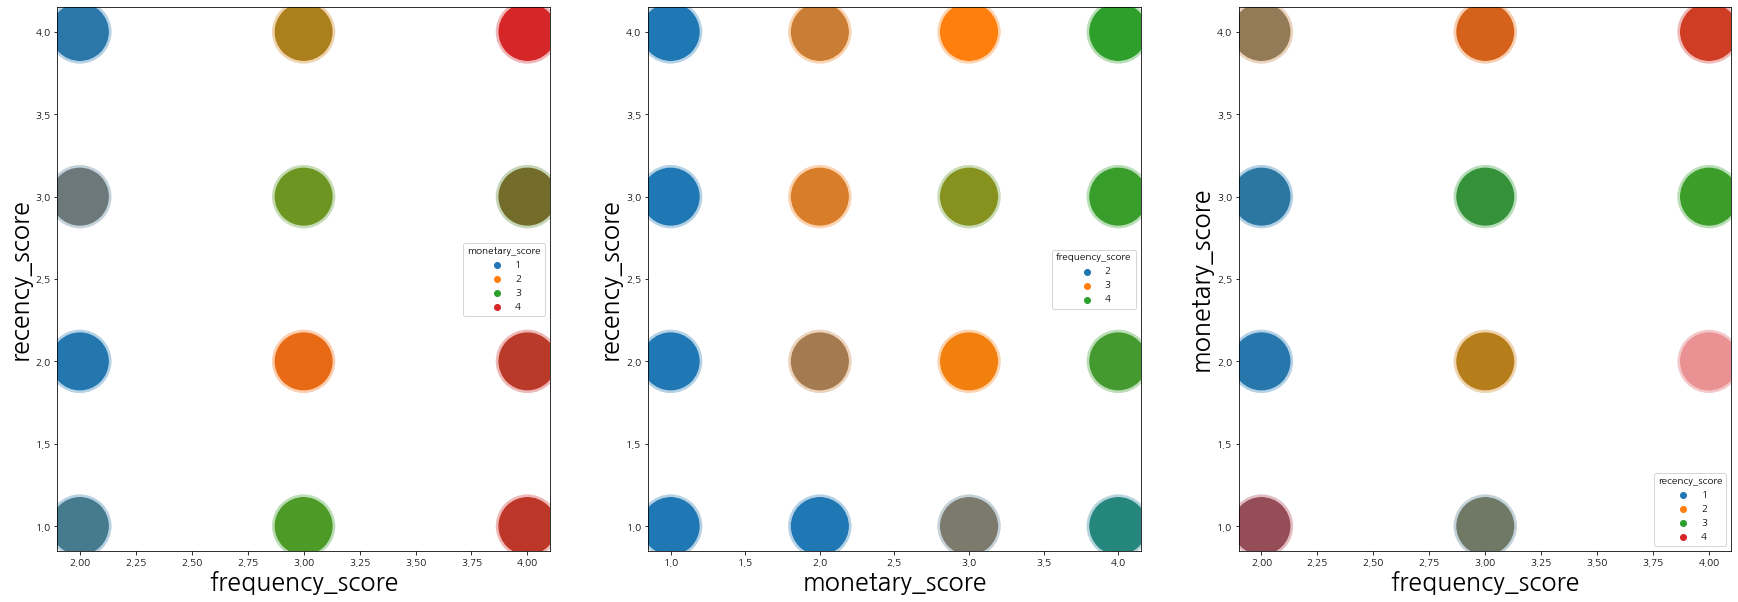

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(30,10))

sns.scatterplot(data=RFM, x='frequency_score', y='recency_score', hue='monetary_score', ax=axes[0], s=4000, alpha=0.5, palette='tab10')
sns.scatterplot(data=RFM, x='monetary_score', y='recency_score', hue='frequency_score', ax=axes[1], s=4000, alpha=0.5, palette='tab10')
sns.scatterplot(data=RFM, x='frequency_score', y='monetary_score', hue='recency_score', ax=axes[2], s=4000, alpha=0.5, palette='tab10')

axes[0].set_xlabel('frequency_score', fontsize=25)
axes[1].set_xlabel('monetary_score', fontsize=25)
axes[2].set_xlabel('frequency_score', fontsize=25)

axes[0].set_ylabel('recency_score', fontsize=25)
axes[1].set_ylabel('recency_score', fontsize=25)
axes[2].set_ylabel('monetary_score', fontsize=25)

plt.show()

In [26]:
rfm_gold_by_seg = pd.crosstab(RFM['RFM_score'], RFM['is_gold'])
rfm_gold_by_seg

is_gold,False,True
RFM_score,,
121,1822,0
122,784,0
123,54,1
124,3,41
131,2,0
132,217,0
133,276,0
134,10,12
143,25,0


In [27]:
rfm_by_seg = RFM.groupby('RFM_score').mean()
rfm_by_seg

,recency,frequency,monetary,is_gold,recency_score,frequency_score,monetary_score
RFM_score,,,,,,,
121,97.743139,1.045554,35.233675,0.000000,1.0,2.0,1.0
122,94.275510,1.528061,74.502663,0.000000,1.0,2.0,2.0
123,93.254545,1.781818,166.562431,0.018182,1.0,2.0,3.0
124,91.159091,1.363636,466.341550,0.931818,1.0,2.0,4.0
131,93.000000,3.000000,49.880000,0.000000,1.0,3.0,1.0
132,88.907834,3.410138,97.256576,0.000000,1.0,3.0,2.0
133,86.300725,4.492754,191.989192,0.000000,1.0,3.0,3.0
134,91.636364,4.363636,491.880382,0.545455,1.0,3.0,4.0
143,86.400000,9.480000,274.219981,0.000000,1.0,4.0,3.0


In [28]:
rfm_by_seg_2 = pd.concat([rfm_by_seg, rfm_gold_by_seg], axis=1)
rfm_by_seg_2

,recency,frequency,monetary,is_gold,recency_score,frequency_score,monetary_score,False,True
RFM_score,,,,,,,,,
121,97.743139,1.045554,35.233675,0.000000,1.0,2.0,1.0,1822,0
122,94.275510,1.528061,74.502663,0.000000,1.0,2.0,2.0,784,0
123,93.254545,1.781818,166.562431,0.018182,1.0,2.0,3.0,54,1
124,91.159091,1.363636,466.341550,0.931818,1.0,2.0,4.0,3,41
131,93.000000,3.000000,49.880000,0.000000,1.0,3.0,1.0,2,0
132,88.907834,3.410138,97.256576,0.000000,1.0,3.0,2.0,217,0
133,86.300725,4.492754,191.989192,0.000000,1.0,3.0,3.0,276,0
134,91.636364,4.363636,491.880382,0.545455,1.0,3.0,4.0,10,12
143,86.400000,9.480000,274.219981,0.000000,1.0,4.0,3.0,25,0


In [29]:
rfm_by_seg_2.sort_values(['monetary_score', 'frequency_score', 'recency_score'], ascending=False)

,recency,frequency,monetary,is_gold,recency_score,frequency_score,monetary_score,False,True
RFM_score,,,,,,,,,
444,2.113607,29.383825,1406.620504,0.281130,4.0,4.0,4.0,1120,438
344,13.907059,17.558824,894.796914,0.222353,3.0,4.0,4.0,661,189
244,42.404669,16.431907,746.190543,0.155642,2.0,4.0,4.0,217,40
144,86.260000,15.380000,762.785960,0.180000,1.0,4.0,4.0,41,9
434,3.093750,5.562500,608.195182,0.640625,4.0,3.0,4.0,46,82
334,15.257862,5.396226,652.460619,0.610063,3.0,3.0,4.0,62,97
234,44.481481,5.175926,659.889301,0.685185,2.0,3.0,4.0,34,74
134,91.636364,4.363636,491.880382,0.545455,1.0,3.0,4.0,10,12
424,2.730769,1.653846,431.615716,0.961538,4.0,2.0,4.0,1,25


In [30]:
# if (R 3~4) & (1<=F<=4) & (M=4) # Purple
# else if (3<=R<=4) & (1<=F<=4) & (M=3) # Blue
# else if (3<=R<=4) & (1<=F<=4) & (1<=M<=2) # Green
# else if (1<=R<=2) & (1<=F<=4) & (3<=M<=4) # Red
# else (1<=R<=2) & (1<=F<=4) & (1<=M<=2) # white

In [31]:
# 최근(R 3~4)에 큰 돈(M 4) 쓴 친구들
Purple_seg = ['444', '434', '344', '334', '414', '424', '314', '324']

# 최근(R 3~4)에 자주 와서(F 3~4) 꽤 큰돈(M 3) 쓰고 간 친구들
Blue_seg = ['333', '343', '433', '443', '413', '423', '313', '323']

# 최근(R 3~4)에 왔는데 돈은 많이 안쓴(M 1~2) 친구들
Green_seg = ['321', '311', '322', '332', '411', '421', '422', '432', '311', '322', '431', '331', '442']

# 꽤나 많은 돈(3~4)을 썼지만 요즘엔 잘 안오는 친구(1~2)들
Red_seg = ['114', '124', '134', '144', '113', '123', '133' '244', '243', '234', '233', '224', '223', '214', '143', '244', '133', '213']

# 최근에 안왔고(1~2), 돈도 많이 안 쓴 친구들(1~2)
White_seg = ['131', '111', '121', '211', '221', '122', '222', '132', '232', '231']

In [32]:
RFM.loc[RFM['RFM_score'].isin(Purple_seg), 'segment'] = 'Purple'
RFM.loc[RFM['RFM_score'].isin(Blue_seg), 'segment'] = 'Blue'
RFM.loc[RFM['RFM_score'].isin(Green_seg), 'segment'] = 'Green'
RFM.loc[RFM['RFM_score'].isin(Red_seg), 'segment'] = 'Red'
RFM.loc[RFM['RFM_score'].isin(White_seg), 'segment'] = 'White'

In [33]:
RFM

,recency,frequency,monetary,is_gold,recency_score,frequency_score,monetary_score,RFM_score,segment
analytical_customer_id,,,,,,,,,
0-4ImcwasFRtaAquwJ2uYhwQ,116,1,25.5000,False,1,2,1,121,White
0-4cZutO5WRNOZM4t5lHp_yQ,4,4,92.0236,False,4,3,2,432,Green
0-6kezqWu6RNW65Qqd9p-0KQ,43,1,76.2324,False,2,2,2,222,White
0-QdgcyCbrT3Ca-wyteQXQzw,91,1,39.3800,False,1,2,1,121,White
000rjpX6uhTU6gYcXqhmsbiA,119,1,52.7424,False,1,2,1,121,White
...,...,...,...,...,...,...,...,...,...
zxcS6ybyTgQDye6kbY45xDuw,59,1,40.1824,False,2,2,1,221,White
zy2Seop-MVRI-oHbpOa9eSEQ,98,1,31.8760,False,1,2,1,121,White
zyjOsCm-CkQ2-XZamK_C8T_Q,83,1,44.1024,False,1,2,1,121,White


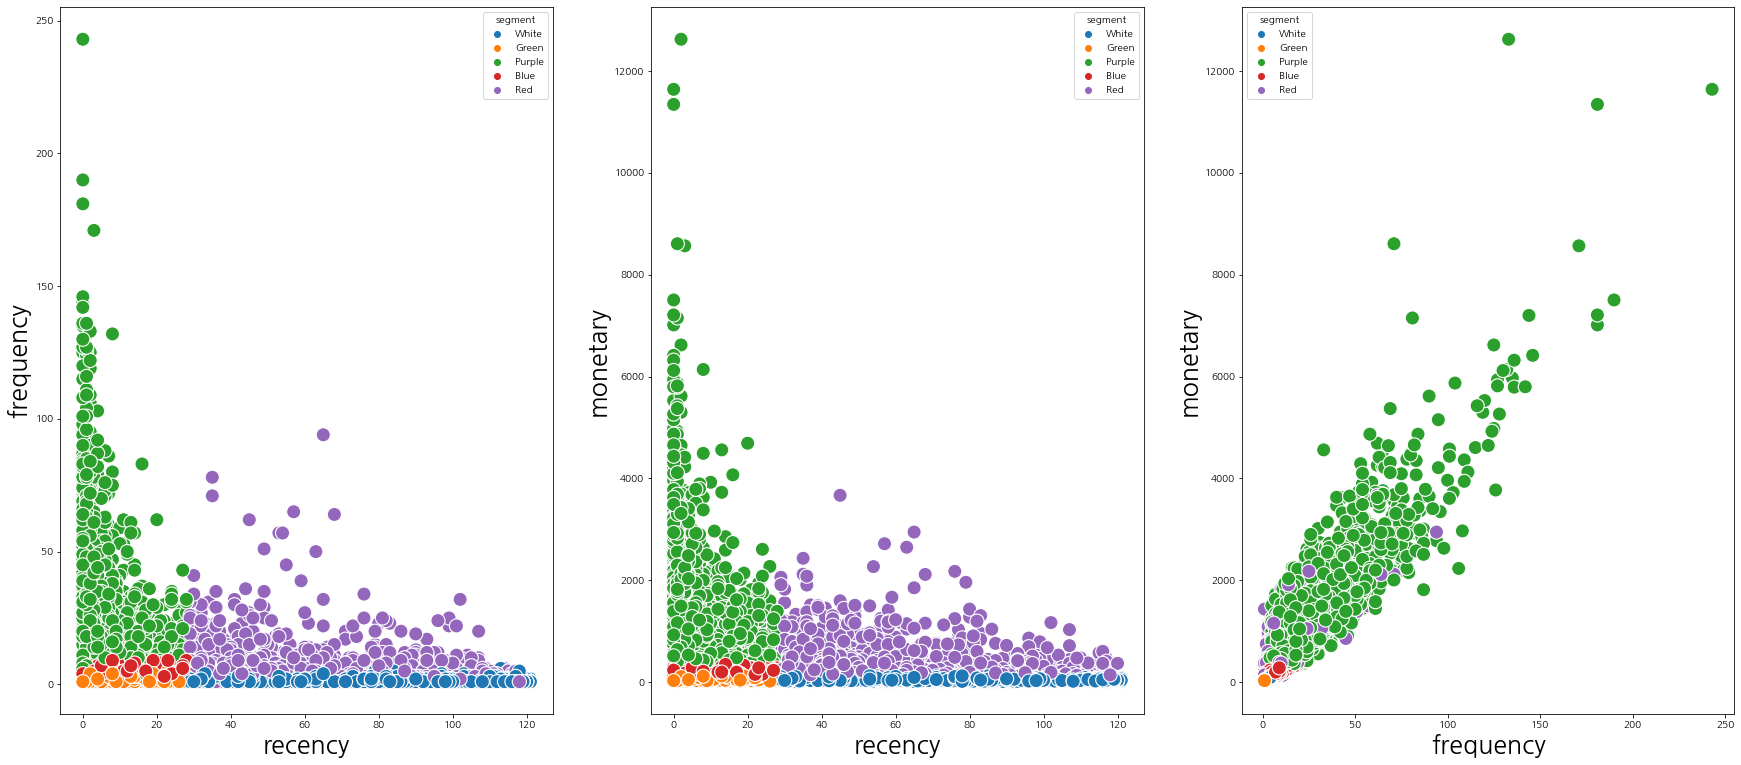

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(30,13))

sns.scatterplot(data=RFM, x='recency', y='frequency', hue='segment', ax=axes[0], s=200)
sns.scatterplot(data=RFM, x='recency', y='monetary', hue='segment', ax=axes[1], s=200)
sns.scatterplot(data=RFM, x='frequency', y='monetary', hue='segment', ax=axes[2], s=200)

axes[0].set_xlabel('recency', fontsize=25)
axes[1].set_xlabel('recency', fontsize=25)
axes[2].set_xlabel('frequency', fontsize=25)

axes[0].set_ylabel('frequency', fontsize=25)
axes[1].set_ylabel('monetary', fontsize=25)
axes[2].set_ylabel('monetary', fontsize=25)

plt.show()

In [35]:
RFM.segment.value_counts()

White     4799
Purple    2767
Blue      2013
Red       1791
Green     1771
Name: segment, dtype: int64

In [36]:
RFM[RFM.segment.isnull()]['RFM_score'].values

array([], dtype=object)

In [37]:
segment_list = RFM.segment.unique()

In [38]:
Purple = RFM[RFM['segment']=='Purple']
White = RFM[RFM['segment']=='White']
Green = RFM[RFM['segment']=='Green']
Red = RFM[RFM['segment']=='Red']
Yellow = RFM[RFM['segment']=='Yellow']
Blue = RFM[RFM['segment']=='Blue']

In [39]:
Purple_mean = Purple[['recency', 'frequency', 'monetary']].mean().to_frame().T
Purple_mean.index=['Purple']
Blue_mean = Blue[['recency', 'frequency', 'monetary']].mean().to_frame().T
Blue_mean.index=['Blue']
Green_mean = Green[['recency', 'frequency', 'monetary']].mean().to_frame().T
Green_mean.index=['Green']
Red_mean = Red[['recency', 'frequency', 'monetary']].mean().to_frame().T
Red_mean.index=['Red']
White_mean = White[['recency', 'frequency', 'monetary']].mean().to_frame().T
White_mean.index=['White']

Purple_median = Purple[['recency', 'frequency', 'monetary']].median().to_frame().T
Purple_median.index=['Purple']
Blue_median = Blue[['recency', 'frequency', 'monetary']].median().to_frame().T
Blue_median.index=['Blue']
Green_median = Green[['recency', 'frequency', 'monetary']].median().to_frame().T
Green_median.index=['Green']
Red_median = Red[['recency', 'frequency', 'monetary']].median().to_frame().T
Red_median.index=['Red']
White_median = White[['recency', 'frequency', 'monetary']].median().to_frame().T
White_median.index=['White']

In [41]:
seg_mean = pd.concat([Purple_mean, Blue_mean, Green_mean, Red_mean, White_mean], axis=0).reset_index()
seg_mean = seg_mean.rename(columns={'index':'segment'})
seg_mean

,segment,recency,frequency,monetary
0,Purple,6.783520,22.546802,1143.851883
1,Blue,11.334327,5.790363,225.728570
2,Green,12.379447,1.893281,72.204747
3,Red,55.575098,6.840871,341.603765
4,White,76.610961,1.534903,57.049614


In [ ]:
# purple은 돈을 많이 쓰는 우량 고객층임
# Blue와 Green은 purple만큼 큰 금액을 내는 층은 아니나
# Blue는 자주 오고, 

In [42]:
seg_median = pd.concat([Purple_median, Blue_median, Green_median, Red_median, White_median], axis=0).reset_index()
seg_median = seg_median.rename(columns={'index':'segment'})
seg_median

,segment,recency,frequency,monetary
0,Purple,4.0,16.0,811.3800
1,Blue,10.0,5.0,216.6148
2,Green,12.0,2.0,70.2904
3,Red,49.0,5.0,237.3420
4,White,77.0,1.0,48.2740


In [43]:
(RFM.groupby('segment')['is_gold'].mean()*100).round(2)

segment
Blue       0.30
Green      0.11
Purple    31.69
Red       12.12
White      0.00
Name: is_gold, dtype: float64

In [44]:
pd.crosstab(RFM['segment'], RFM['is_gold'])

is_gold,False,True
segment,,
Blue,2007,6
Green,1769,2
Purple,1890,877
Red,1574,217
White,4799,0


In [47]:
success_delivery.basket_amount_lc.max()

7100.0

In [48]:
success_delivery.affordability_amt_total.max()

1584.0

In [49]:
success_delivery.affordability_amt_total.mean()

47.858369626925125